<a href="https://colab.research.google.com/github/ChiomaO15/Flux-Balance-analysis/blob/main/FLUX_BALANCE_ANALYSIS_OF_BACILLUS_COAGULANS_AND_BACILLUS_AMYLOLIQUEFACIENS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Flux Balance Analysis (FBA) will be performed using COBRApy, a Python-based package for constraint-  based modeling. FBA will predict the distribution of metabolic fluxes under various conditions simulating real-life scenarios like the gut environment using targeted metabolites that are crucial for probiotic efficacy

In [ ]:
pip install cobra


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 17.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.5/45.5 kB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 141.8/141.8 kB 10.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.0/8.0 MB 78.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.6/117.6 kB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 62.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 722.2/722.2 kB 30.2 MB/s eta 0:00:00


In [ ]:
import cobra
import pandas as pd

# Load the models for Bacillus coagulans and Bacillus amyloliquefaciens
bc_model = cobra.io.read_sbml_model("/content/Bacilluscoagulansmodel.sbml")
ba_model = cobra.io.read_sbml_model("/content/Bamyloliquefaciensmodel.sbml")


Streaming output truncated to the last 5000 lines.


In [ ]:
# Define different nutrient conditions
complex_nutrient_conditions = {
    "High Nutrient": {
        'EX_cpd00027_b': -10.0,  # Glucose
        'EX_cpd00159_b': -10.0,  # Lactate
        'EX_cpd00029_b': -5.0,   # Acetate
        'EX_cpd00035_b': -5.0,   # Alanine
        'EX_cpd00053_b': -5.0,   # Glutamine
        'EX_cpd00220_b': -0.5,   # Riboflavin (Vitamin B2)
        'EX_cpd12543_b': -0.2,   # Biotin (Vitamin B7)
        'EX_cpd00793_b': -0.2,   # Thiamine (Vitamin B1)
        'EX_cpd00526_b': -1.0,   # Bile salts
        'EX_cpd00007_b': -20.0,  # Oxygen
        'EX_cpd00011_b': -10.0,  # Carbon dioxide
    },
    "Low Nutrient": {
        'EX_cpd00027_b': -2.0,   # Glucose
        'EX_cpd00159_b': -2.0,   # Lactate
        'EX_cpd00029_b': -1.0,   # Acetate
        'EX_cpd00035_b': -1.0,   # Alanine
        'EX_cpd00053_b': -1.0,   # Glutamine
        'EX_cpd00220_b': -0.2,   # Riboflavin
        'EX_cpd12543_b': -0.1,   # Biotin
        'EX_cpd00793_b': -0.1,   # Thiamine
        'EX_cpd00526_b': -0.5,   # Bile salts
        'EX_cpd00007_b': -5.0,   # Oxygen
    },
    "Gut Stress": {
        'EX_cpd00027_b': -5.0,   # Glucose
        'EX_cpd00159_b': -3.0,   # Lactate
        'EX_cpd02733_b': -2.0,   # Bile acids
        'EX_cpd00220_b': -0.5,   # Riboflavin
        'EX_cpd12543_b': -0.2,   # Biotin
        'EX_cpd00793_b': -0.2,   # Thiamine
        'EX_cpd00011_b': -5.0,   # Carbon dioxide
        'EX_cpd00007_b': -0.1,   # Minimal oxygen (gut-like)
    },
    "Extreme Gut Stress": {
        'EX_cpd00027_b': -3.0,   # Reduced Glucose
        'EX_cpd00159_b': -3.0,   # Lactate
        'EX_cpd00029_b': -2.0,   # Acetate
        'EX_cpd00035_b': -1.0,   # Alanine
        'EX_cpd00053_b': -1.0,   # Glutamine
        'EX_cpd00526_b': -2.0,   # Bile salts
        'EX_cpd00220_b': -0.5,   # Riboflavin
        'EX_cpd12543_b': -0.3,   # Biotin
        'EX_cpd00793_b': -0.3,   # Thiamine
        'EX_cpd00011_b': -10.0,  # Carbon dioxide
        'EX_cpd00007_b': -0.05,  # Reduced oxygen availability
    }
}


# Initialize DataFrame to store results
results = []

# Run simulations for each condition and strain
for condition_name, nutrients in complex_nutrient_conditions.items():
    for model, strain_name in zip([bc_model, ba_model], ["Bacillus coagulans", "Bacillus amyloliquefaciens"]):
        # Set the medium for the model
        for metabolite, uptake_rate in nutrients.items():
            if metabolite in model.reactions:
                exchange_rxn = model.reactions.get_by_id(metabolite)
                exchange_rxn.lower_bound = uptake_rate

        # Set the objective function to biomass production
        model.objective = "bio1"

        # Run FBA
        solution = model.optimize()

        # Collect fluxes for selected metabolites
        fluxes = {
            "Strain": strain_name,
            "Condition": condition_name,
            "Biomass": solution.objective_value,
        }
        for rxn_id in ["EX_cpd00023", "EX_cpd00051", "EX_cpd00053", "EX_cpd00060", "EX_cpd00220"]:
            if rxn_id in model.reactions:
                fluxes[rxn_id] = solution.fluxes.get(rxn_id, None)

        # Add to results
        results.append(fluxes)
        # Convert results to DataFrame
        results_df = pd.DataFrame(results)
        print(results_df)

        # Save to CSV for detailed analysis
        results_df.to_csv("nutrient_condition_fluxes.csv", index=False)



               Strain      Condition  Biomass
0  Bacillus coagulans  High Nutrient  31.4875
                       Strain      Condition    Biomass
0          Bacillus coagulans  High Nutrient  31.487500
1  Bacillus amyloliquefaciens  High Nutrient  78.707576
                       Strain      Condition    Biomass
0          Bacillus coagulans  High Nutrient  31.487500
1  Bacillus amyloliquefaciens  High Nutrient  78.707576
2          Bacillus coagulans   Low Nutrient  12.595000
                       Strain      Condition    Biomass
0          Bacillus coagulans  High Nutrient  31.487500
1  Bacillus amyloliquefaciens  High Nutrient  78.707576
2          Bacillus coagulans   Low Nutrient  12.595000
3  Bacillus amyloliquefaciens   Low Nutrient  78.635850
                       Strain      Condition    Biomass
0          Bacillus coagulans  High Nutrient  31.487500
1  Bacillus amyloliquefaciens  High Nutrient  78.707576
2          Bacillus coagulans   Low Nutrient  12.595000
3  Bacillus 

Visualizing our results


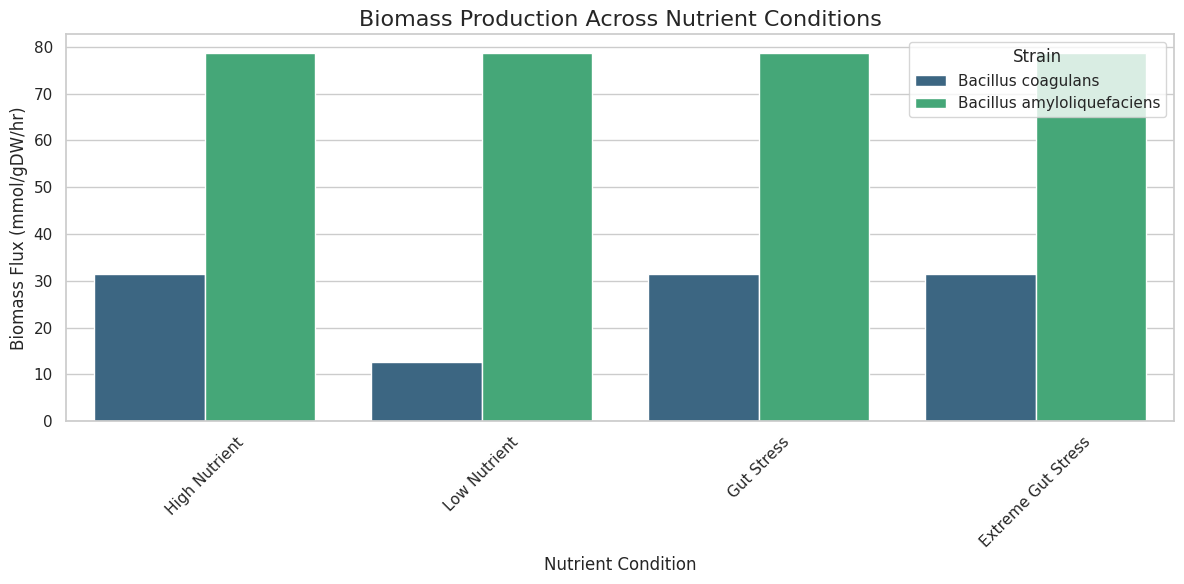

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# the 'results_df' contains the data
# results_df = pd.read_csv("nutrient_condition_fluxes.csv")

# Set up the plot style
sns.set(style="whitegrid")

# Create a bar plot
plt.figure(figsize=(12, 6))
sns.barplot(
    data=results_df,
    x="Condition",
    y="Biomass",
    hue="Strain",
    palette="viridis"
)

# Customize the plot
plt.title("Biomass Production Across Nutrient Conditions", fontsize=16)
plt.xlabel("Nutrient Condition", fontsize=12)
plt.ylabel("Biomass Flux (mmol/gDW/hr)", fontsize=12)
plt.xticks(rotation=45)
plt.legend(title="Strain")
plt.tight_layout()

# Show the plot
plt.show()
